## 합성곱 신경망 소개

합성곱 신경망(Convolutional Neural Networks, CNN)은 이미지나 비디오 등의 공간적 구조를 가진 데이터를 처리하는 데 유용한 딥러닝 모델

- 입력 레이어: 원시 이미지 데이터를 받아들이는 첫 번째 레이어. 이미지는 보통 높이, 너비, 그리고 색상 채널(예: RGB)의 3차원 텐서로 표현.

- 합성곱 레이어(Convolutional Layer): 이 레이어는 이미지의 지역적 특성을 학습. 이 레이어에서는 "필터" 또는 "커널"이라는 작은 윈도우가 이미지를 스캔하며 이동. 각 필터는 고유한 특징(예: 가장자리, 텍스처 등)을 인식.

- 필터/커널: 합성곱 층에서 사용되는 작은 행렬로, 랜덤한 값으로 초기화된 후에 데이터를 통해 학습. 필터는 이미지의 여러 부분을 스캔하며 특정 특징을 인식. 각 필터는 이미지의 다른 특성을 감지하는 역할을 한다. 예를 들어, 어떤 필터는 가로선을, 다른 필터는 세로선을, 또 다른 필터는 모서리나 특정 패턴을 감지할 수 있습니다. 여러 개의 필터를 사용함으로써, 다양한 특성을 추출하고 이미지를 더 잘 이해할 수 있다.

- 스트라이드: 필터가 이미지 위를 이동하는 간격. 스트라이드 값에 따라 출력 피쳐 맵의 크기가 결정되며 큰 스트라이드는 작은 출력 차원을 생성하고, 작은 스트라이드는 큰 출력 차원을 생성.

- 패딩: 입력 이미지의 주위에 픽셀을 추가하는 방법으로, 합성곱이 적용된 후의 출력 크기를 조절할 수 있다. 패딩이 없으면 합성곱 연산을 거치면서 출력 이미지의 크기가 작아진다. 패딩을 사용하면 이를 방지하고 원본 이미지의 공간적 크기를 보존할 수 있다.

- 활성화 함수: 일반적으로 ReLU(Rectified Linear Unit) 같은 비선형 활성화 함수가 사용되어 복잡한 패턴을 학습할 수 있도록 한다.

- 풀링 레이어(Pooling Layer): 이 레이어는 출력을 다운샘플링하여 모델의 복잡도를 줄이고, 과적합을 방지하며, 일부 공간적 인식력을 보존. 가장 많이 사용되는 풀링 방법은 최대 풀링(Max Pooling)이다.

- 완전 연결 레이어(Fully Connected Layer): 이 레이어는 모든 입력 뉴런이 모든 출력 뉴런과 연결되어 있다. 이는 일반적으로 신경망의 마지막 단계에서 사용되며, 합성곱 및 풀링 레이어를 통해 학습된 고차원 특징을 이용하여 최종적으로 분류나 회귀 등의 작업을 수행.

- 이러한 각 요소들이 어떻게 함께 작동하는지 간단하게 설명하면, 합성곱 레이어의 필터는 입력 이미지를 스캔하면서 지역적인 특징을 감지하고, 이 정보를 활성화 맵(특징 맵)의 형태로 출력. 이때, 스트라이드와 패딩은 필터가 이미지를 어떻게 스캔할지를 결정하며, 활성화 함수는 비선형성을 추가하여 복잡한 패턴을 학습하게 해준다. 그 다음, 풀링 레이어는 이 특징 맵을 다운샘플링하여 모델의 복잡도를 줄이고, 공간적 인식력을 보존하며, 과적합을 방지한다. 마지막으로, 완전 연결 레이어는 이런 모든 특징들을 종합하여 최종적으로 이미지의 클래스를 예측하거나, 객체의 위치를 회귀하는 등의 작업을 수행한다.
이런 식으로, CNN은 각 레이어에서 이미지의 다양한 특징을 학습하고, 이 정보를 바탕으로 복잡한 패턴을 인식하고, 효과적인 예측을 수행하게 됩니다.

- 2D 합성곱 (Conv2D): 이는 가장 흔히 사용되는 합성곱 유형으로, 이미지 같은 2차원 데이터에 적용. Conv2D는 입력 데이터의 지역적 특징을 인식하고 이를 학습하는 데 사용.

- 1D 합성곱 (Conv1D): 이 유형의 합성곱은 시퀀스 데이터(예: 시계열 데이터, 텍스트 데이터)를 처리하는 데 주로 사용. 이는 입력 시퀀스의 연속적인 부분을 고려하므로, 특히 시간적인 순서 정보가 중요한 문제에 유용.

https://kyeonminsu.tistory.com/30

### 합성곱 신경망을 사용한 이미지 분류

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### 패션 MNIST 데이터 불러오기

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


### 합성곱 신경망 만들기

### 합성곱 신경망(Convolutional Neural Networks, CNNs)에서 필터(또는 커널)를 여러 개 사용하는 이유

- 특성 추출: 각 필터는 이미지의 다른 특성을 감지하는 역할을 합니다. 예를 들어, 어떤 필터는 가로선을, 다른 필터는 세로선을, 또 다른 필터는 모서리나 특정 패턴을 감지할 수 있습니다. 여러 개의 필터를 사용함으로써, 다양한 특성을 추출하고 이미지를 더 잘 이해할 수 있습니다.

- 복잡한 패턴 학습: 초기 층의 필터가 간단한 특성을 추출하는 데 사용된다면, 네트워크의 깊은 층으로 갈수록 이러한 특성들이 결합되어 더 복잡한 패턴을 학습할 수 있습니다. 예를 들어, 얼굴 인식을 위한 CNN에서는 초기 층이 간단한 가장자리를 감지하는 반면, 더 깊은 층에서는 눈, 코, 입과 같은 특징을 학습하고, 최종적으로는 얼굴 전체의 복잡한 패턴을 인식할 수 있습니다.

- 증가된 모델의 용량: 여러 개의 필터를 사용함으로써, 모델은 더 많은 정보를 처리하고 저장할 수 있게 됩니다. 이는 모델이 더 복잡한 함수를 학습하고, 더 다양한 데이터에 대해 일반화할 수 있게 만듭니다.

- 다양한 해상도의 정보 포착: 다양한 크기의 필터를 사용하면, 다른 해상도에서의 특성을 포착할 수 있습니다. 작은 필터는 미세한 패턴을, 큰 필터는 이미지의 광범위한 구조를 감지할 수 있습니다. 이는 이미지의 다양한 측면을 이해하는 데 도움이 됩니다.

In [4]:
model = keras.Sequential()

In [5]:
# padding='same'은 입력 데이터 주변을 0으로 채우는 '제로 패딩'을 의미. padding이 없는 경우는 padding='valid'로 표현
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [6]:
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

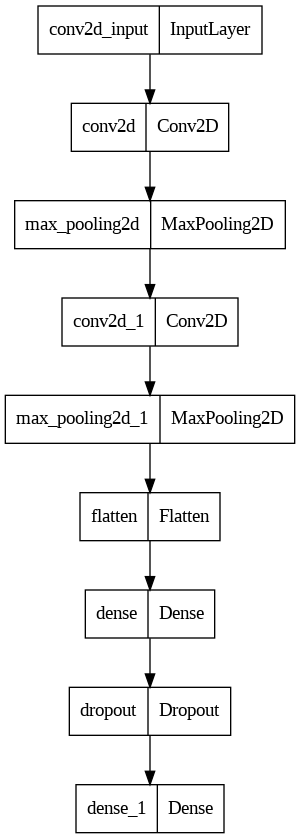

In [10]:
#  TensorFlow의 Keras API를 사용하여 정의된 신경망 모델의 구조를 시각화
keras.utils.plot_model(model)

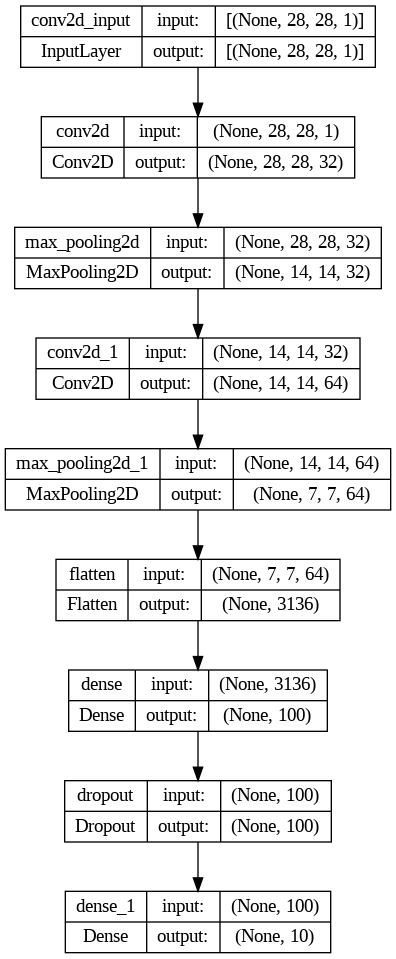

In [11]:
# 모델의 구조를 'model.png' 파일로 저장하며, 각 레이어에서의 입력과 출력의 형태를 그림에 포함
keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [12]:
!ls

drive  model.png  sample_data


## 모델 컴파일과 훈련

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/kdt_231026/m8_vision/best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1490/1500 [============================>.] - ETA: 0s - loss: 0.5077 - accuracy: 0.8179

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 11s 4ms/step - loss: 0.5073 - accuracy: 0.8181 - val_loss: 0.3183 - val_accuracy: 0.8836
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3355 - accuracy: 0.8788 - val_loss: 0.2757 - val_accuracy: 0.8947
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2880 - accuracy: 0.8969 - val_loss: 0.2431 - val_accuracy: 0.9087
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2531 - accuracy: 0.9080 - val_loss: 0.2309 - val_accuracy: 0.9142
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2288 - accuracy: 0.9163 - val_loss: 0.2340 - val_accuracy: 0.9122
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2090 - accuracy: 0.9237 - val_loss: 0.2121 - val_accuracy: 0.9225
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1920 - accuracy: 0.9279 - val_loss: 0.2112 - val_accuracy: 0.9226
Ep

In [14]:
import matplotlib.pyplot as plt

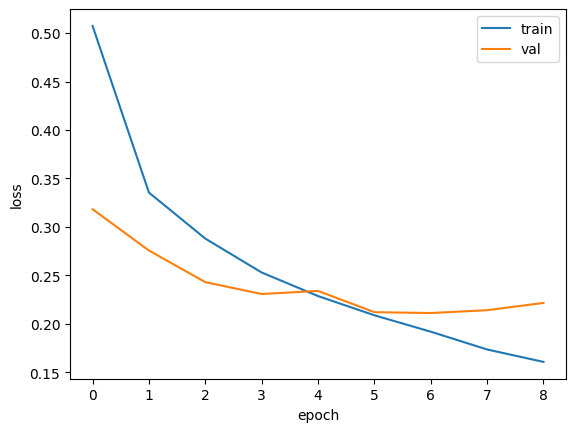

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2112 - accuracy: 0.9226


[0.2112453132867813, 0.9225833415985107]

In [17]:
val_scaled.shape

(12000, 28, 28, 1)

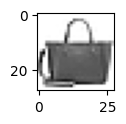

In [23]:
plt.figure(figsize=(1, 1))
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [24]:
# 배열에서 첫 번째 요소(인덱스 0)를 슬라이싱하여 선택합니다. 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어 (1,28,28,1)의 크기를 만든다.
# 여기서 중요한 점은 슬라이싱을 사용함으로써 반환된 데이터의 형태가 원본 배열의 부분집합을 유지한다는 것입니다
preds = model.predict(val_scaled[0:10])
print(preds)

1/1 [==============================] - 0s 45ms/step
[[6.94460714e-15 4.29412568e-24 8.25698098e-19 1.06139608e-16
  1.12480152e-16 2.01885587e-13 2.18133034e-13 2.53314711e-15
  1.00000000e+00 8.18642322e-17]
 [1.04198921e-06 9.23106101e-13 9.36637221e-08 1.15618981e-13
  6.12722893e-12 8.38322814e-11 1.49941588e-08 4.36708714e-09
  9.99998808e-01 3.53878149e-09]
 [1.38074263e-12 2.00457798e-16 2.35349256e-13 3.34991637e-13
  9.89366737e-14 6.88765454e-08 1.92960323e-14 9.99999523e-01
  1.12659766e-13 3.01214754e-07]
 [4.96771208e-05 7.73203581e-08 4.57160659e-02 1.24002863e-05
  9.20056522e-01 1.30822940e-07 3.41640785e-02 2.87354229e-09
  6.98132681e-07 3.42323744e-07]
 [3.34797619e-13 2.23990089e-21 5.95791699e-16 1.54949296e-14
  3.58131544e-15 5.67708967e-15 1.66800243e-12 4.19511778e-12
  1.00000000e+00 9.83388642e-17]
 [5.75807280e-06 8.15525070e-09 1.65451486e-02 8.50538072e-07
  9.58083212e-01 1.15855481e-09 2.53646877e-02 4.17405843e-09
  1.85968432e-07 1.22418214e-07]
 [1.98

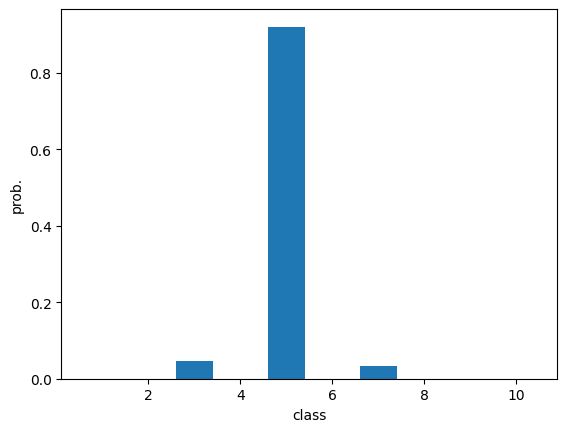

In [26]:
# 첫 번째 이미지(0번째 인덱스)에 대한 카테고리를 예측하고, 해당 예측에 대한 확률 분포를 반환
plt.bar(range(1, 11), preds[3])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [27]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [29]:
import numpy as np
print(classes[np.argmax(preds[3])])

코트


In [30]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [31]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2340 - accuracy: 0.9171


[0.2340177446603775, 0.9171000123023987]